# LSTM 기반 주가예측모델

## 시계열 데이터 분석 Time Series Data
시계열 데이터란 **시간의 흐름에 따라 관찰하거나 측정한 데이터**를 말한다. 이 데이터는 일반적으로 시간의 순서를 가지며, 특정 시점에서의 값을 나타낸다. 예를 들어, 일일 주식 가격, 시간별 기온, 월별 매출 등이 시계열 데이터의 대표적인 예이다.

**주요 특징**
1. **시간 순서**  
   - 데이터가 시간의 흐름에 따라 정렬되어 있어야 한다. 시간의 순서가 데이터를 분석할 때 중요한 기준이 된다.
2. **시간 종속성**  
   - 이전 시점의 데이터가 이후 시점의 데이터에 영향을 미칠 수 있다.
3. **패턴과 추세**  
   - 주기적인 패턴(계절성)이나 장기적인 변화(추세)를 포함할 수 있다.
4. **불확실성**  
   - 시계열 데이터는 종종 노이즈(잡음)를 포함하며, 예측이 어려울 수 있다.

**활용**
- **금융**: 주식 가격, 환율 변동
- **기상**: 기온, 강수량 예측
- **경제**: GDP, 실업률 변화
- **소비자 행동**: 웹사이트 방문 트래픽, 제품 판매 데이터

**분석 및 모델링 방법**
- **EDA (탐색적 데이터 분석)**  
  - 데이터 시각화, 계절성, 추세 확인
- **통계적 모델링**  
  - ARIMA, SARIMA 등
- **머신러닝**  
  - 시계열 데이터에 특화된 RNN, LSTM, Transformer 등을 활용

시계열 데이터는 과거 데이터를 기반으로 미래를 예측하거나 현재의 상태를 분석하는 데 중요한 역할을 한다.

In [11]:
%pip install finance-datareader

Note: you may need to restart the kernel to use updated packages.


FinanceDataReader(보통 fdr로 임포트)은 파이썬에서 주가/지수/환율 같은 금융 시계열 데이터를 쉽게 가져오게 해주는 라이브러리이다.
pandas.DataFrame 형태로 바로 받아서 분석·시각화·모델링까지 바로 진행 가능하다.

하는 일: 종목 코드(예: 삼성전자 005930), 지수(예: KOSPI), 해외 종목(예: AAPL) 등을 지정해서 기간별 가격 데이터(시가/고가/저가/종가/거래량 등) 를 불러옴
장점: 웹 크롤링/API 호출을 직접 짤 필요 없이 fdr.DataReader(...) 한 줄로 데이터 로드 가능
주의: 데이터는 “어디서 가져오느냐(데이터 소스)”에 따라 지원 범위/컬럼/정확도/지연이 조금씩 다를 수 있음

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import FinanceDataReader as fdr    # 금융 데이터 수집 (추가/지수 등)

In [13]:
# FinanceDataReader로 삼성전자 주가 데이터 가져오기
samsung_code = '005930'
samsung = fdr.DataReader(samsung_code)  # 종목코드로 주가 데이터 로드 (DataFrame)

samsung

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2013-11-05,30040,30040,29440,29700,160186,NaN
2013-11-06,29959,29959,28979,29020,244368,-0.022896
2013-11-07,29020,29080,28500,28740,260136,-0.009649
2013-11-08,28220,28560,28140,28200,273627,-0.018789
2013-11-11,28500,28680,28180,28560,171277,0.012766
...,...,...,...,...,...,...
2026-01-19,147200,150600,146600,149300,22762497,0.002686
2026-01-20,148500,149300,143900,145200,24059218,-0.027461
2026-01-21,141900,149800,141800,149500,31703610,0.029614


| 항목   | 의미 |
|--------|------|
| Open   | 시작가 |
| High   | 고가 |
| Low    | 저가 |
| Close  | 종가 (주로 활용) |
| Volume | 거래량 |
| Change | 전일 대비 변화율 / 변화량 *(데이터 소스에 따라 변동)* |

In [15]:
# apple = fdr.DataReader('AAPL')    # 전체 기간
apple = fdr.DataReader('AAPL', '2025-01-01', '2025-12-31')
apple

,Open,High,Low,Close,Volume,Adj Close
2024-12-31,252.440002,253.279999,249.429993,250.419998,39480700,249.292496
2025-01-02,248.929993,249.100006,241.820007,243.850006,55740700,242.752106
2025-01-03,243.360001,244.179993,241.889999,243.360001,40244100,242.264313
2025-01-06,244.309998,247.330002,243.199997,245.000000,45045600,243.896912
2025-01-07,242.979996,245.550003,241.350006,242.210007,40856000,241.119492
...,...,...,...,...,...,...
2025-12-23,270.839996,272.500000,269.559998,272.359985,29642000,272.359985
2025-12-24,272.339996,275.429993,272.200012,273.809998,17910600,273.809998
2025-12-26,274.160004,275.369995,272.859985,273.399994,21521800,273.399994
2025-12-29,272.690002,274.359985,272.350006,273.760010,23715200,273.760010


## 주식데이터 시각화

In [17]:
naver_code = '035420'
naver = fdr.DataReader(naver_code)
naver.index                         # 날짜 확인(인덱스가 거래일) => 시계열 처리

DatetimeIndex(['2013-11-05', '2013-11-06', '2013-11-07', '2013-11-08',
               '2013-11-11', '2013-11-12', '2013-11-13', '2013-11-14',
               '2013-11-15', '2013-11-18',
               ...
               '2026-01-12', '2026-01-13', '2026-01-14', '2026-01-15',
               '2026-01-16', '2026-01-19', '2026-01-20', '2026-01-21',
               '2026-01-22', '2026-01-23'],
              dtype='datetime64[ns]', name='Date', length=3000, freq=None)

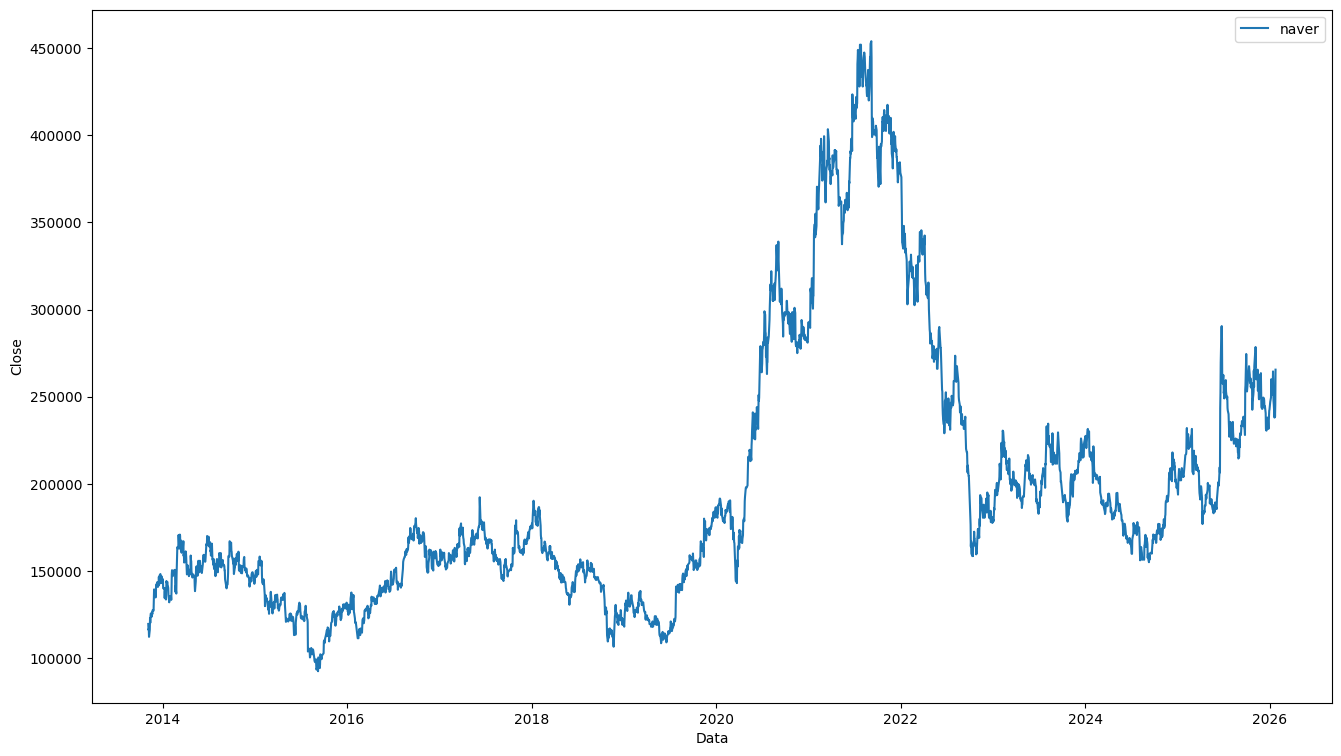

In [18]:
plt.figure(figsize=(16,9))
plt.plot(naver.index, naver["Close"], label='naver')    # 날짜-종가 시계열 라인 플롯
plt.xlabel('Data')
plt.ylabel('Close')
plt.legend()
plt.show()

## 학습데이터 생성

In [27]:
# 종가 정규화 (Min-Max Scaling) : 0 ~ 1
from sklearn.preprocessing import MinMaxScaler      # 최소–최대 정규화를 위한 스케일러

prices = naver['Close'].values                       # 종가(Close) 컬럼을 numpy 배열로 추출

scaler = MinMaxScaler()                              # Min-Max Scaler 객체 생성
prices_scaled = scaler.fit_transform(                # 종가를 0~1 범위로 정규화
    prices.reshape(-1, 1)                            # 2차원 형태로 변환 (샘플, 특성)
).flatten()                                          # 다시 1차원 배열로 변환

prices_scaled                                        # 정규화된 종가 값 출력

array([0.07505621, 0.06563892, 0.06730112, ..., 0.40398651, 0.42334658,
       0.47866106], shape=(3000,))

In [35]:
# 시계열 데이터를 window_size 길이만큼 잘라서 입력(X)과 다음 값(y)으로 만드는 함수
def create_dataset(data, window_size=20):
    X, y = [], []                                # 입력 시퀀스와 타겟을 저장할 리스트
    for i in range(len(data) - window_size):    # window_size만큼 이동하며 슬라이딩
        inputs = data[i : i + window_size]      # 현재 시점부터 window_size 길이 입력
        label = data[i + window_size]            # 입력 바로 다음 시점 값을 타겟으로 사용
        X.append(inputs)                         # 입력 시퀀스 저장
        y.append(label)                          # 타겟 값 저장
    return np.array(X), np.array(y)              # numpy 배열로 변환하여 반환


X, y = create_dataset(prices_scaled)             # 시계열 데이터셋 생성
X.shape, y.shape                                 # 생성된 입력/타겟 데이터 크기 확인

((2980, 20), (2980,))

In [31]:
# 입력 윈도우(X), 타겟(y)을 하나의 DataFrame으로 확인
df = pd.DataFrame(X)        # 입력 시퀀스(X)를 컬럼(윈도우 시점) 단위로 DataFrame 변환
df['target'] = y            # 다음 시점 값(y)를 target 컬럼으로 추가
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,0.075056,0.065639,0.067301,0.054562,0.065639,0.084474,0.076718,0.087798,0.091675,0.090566,...,0.093335,0.090566,0.096659,0.096659,0.096106,0.111616,0.129895,0.127680,0.124911,0.124355
1,0.065639,0.067301,0.054562,0.065639,0.084474,0.076718,0.087798,0.091675,0.090566,0.086689,...,0.090566,0.096659,0.096659,0.096106,0.111616,0.129895,0.127680,0.124911,0.124355,0.117156
2,0.067301,0.054562,0.065639,0.084474,0.076718,0.087798,0.091675,0.090566,0.086689,0.093335,...,0.096659,0.096659,0.096106,0.111616,0.129895,0.127680,0.124911,0.124355,0.117156,0.118818
3,0.054562,0.065639,0.084474,0.076718,0.087798,0.091675,0.090566,0.086689,0.093335,0.090566,...,0.096659,0.096106,0.111616,0.129895,0.127680,0.124911,0.124355,0.117156,0.118818,0.137650
4,0.065639,0.084474,0.076718,0.087798,0.091675,0.090566,0.086689,0.093335,0.090566,0.096659,...,0.096106,0.111616,0.129895,0.127680,0.124911,0.124355,0.117156,0.118818,0.137650,0.137097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,0.383244,0.381861,0.395689,0.402604,0.399838,0.398455,0.384626,0.413667,0.415049,0.427495,...,0.463450,0.442707,0.438558,0.446855,0.451004,0.475895,0.462067,0.428878,0.423347,0.402604
2976,0.381861,0.395689,0.402604,0.399838,0.398455,0.384626,0.413667,0.415049,0.427495,0.434409,...,0.442707,0.438558,0.446855,0.451004,0.475895,0.462067,0.428878,0.423347,0.402604,0.419198
2977,0.395689,0.402604,0.399838,0.398455,0.384626,0.413667,0.415049,0.427495,0.434409,0.463450,...,0.438558,0.446855,0.451004,0.475895,0.462067,0.428878,0.423347,0.402604,0.419198,0.403987
2978,0.402604,0.399838,0.398455,0.384626,0.413667,0.415049,0.427495,0.434409,0.463450,0.442707,...,0.446855,0.451004,0.475895,0.462067,0.428878,0.423347,0.402604,0.419198,0.403987,0.423347


In [32]:
# 시계열 입력/타겟을 PyTorch 텐서로 변환 후 차원 맞추기
import torch

X_tensor = torch.tensor(X, dtype=torch.float).unsqueeze(-1)  # 입력 시계열을 float 텐서로 변환 후 feature 차원 추가
y_tensor = torch.tensor(y, dtype=torch.float).unsqueeze(-1)  # 타겟 값을 float 텐서로 변환 후 차원 추가

X_tensor.shape, y_tensor.shape                               # 입력/타겟 텐서 크기 확인


(torch.Size([2980, 20, 1]), torch.Size([2980, 1]))

In [33]:
# 시계열 텐서를 학습/검증 으로 분리
train_size = int(len(X_tensor) * 0.8)                           # 학습 비율 80% 기준 인덱스
X_train, X_val = X_tensor[:train_size], X_tensor[train_size:]   # 처음 ~ 80 학습, 그 뒤는 검증
y_train, y_val = y_tensor[:train_size], y_tensor[train_size:]

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

torch.Size([2384, 20, 1]) torch.Size([2384, 1])
torch.Size([596, 20, 1]) torch.Size([596, 1])


시계열은 순서가 중요해서 섞지 않고 과거로 학습하고 미래로 검증한다.

## Conv1d 레이어

<img src="https://controlandlearning.wordpress.com/wp-content/uploads/2020/07/figure-1.png" width="500"/>

**1. Conv1d란?**

`nn.Conv1d`는 1차원 시퀀스 데이터를 위한 합성곱 레이어이다.  
예: 시계열 데이터, 텍스트 임베딩 등

**2. 입력/출력 형태**

- 입력 shape: `(batch_size, in_channels, seq_len)`
- 출력 shape: `(batch_size, out_channels, new_seq_len)`

**3. 주요 파라미터**

| 파라미터           | 설명                                        |
| -------------- | ----------------------------------------- |
| `in_channels`  | 입력 채널 수 (예: 임베딩 차원, 또는 이전 conv의 출력 채널 수)  |
| `out_channels` | 출력 채널 수 (필터 개수, convolution 결과 feature 수) |
| `kernel_size`  | 필터 크기 (한 번에 보는 시점의 개수)                    |
| `stride`       | 필터가 이동하는 간격 (기본값=1)                       |
| `padding`      | 입력 시퀀스 앞뒤에 0을 덧붙여서 시퀀스 길이를 조절 (기본값=0)     |


**4.출력길이 계산**

- L: 원래 시퀀스 길이

```
output_length = floor((L + 2 * padding - kernel_size) / stride) + 1
```
위 이미지에서는 패딩이 없으므로 `(5 + 2 * 0 - 2) / 1 + 1 = 4`로 처리

In [34]:
# Conv1d 입력/출력 차원 변환 흐름 확인 예제 : Conv1D 구조 확인
import torch
import torch.nn as nn 

x = torch.randn(1, 20, 1)                      # (batch_size=1, seq_len=20, feature=1)
print('입력', x.shape)

conv1d = nn.Conv1d(
    in_channels=1,                             # 입력 채널 수 (feature 수)
    out_channels=32,                           # 출력 채널 수 (필터 개수)
    kernel_size=5,                             # 커널 크기 (5-step 윈도우)
    padding=4                                  # 패딩 크기 (출력 길이 보존 목적)
)

x = x.permute(0, 2, 1)                         # (batch, seq, feature) → (batch, channel, seq)
print('in 차원변환: ', x.shape)

# Conv1D 요구사항: (batch_size, in_channels, seq_len)
x = conv1d(x)                                  # Conv1D 적용
print("conv1d 출력 :", x.shape)                # (batch_size, out_channels, new_seq_len)

x = x.permute(0, 2, 1)                         # (batch, channel, seq) → (batch, seq, channel)
print('out 차원변환 :', x.shape)


입력 torch.Size([1, 20, 1])
in 차원변환:  torch.Size([1, 1, 20])
conv1d 출력 : torch.Size([1, 32, 24])
out 차원변환 : torch.Size([1, 24, 32])


## 모델 생성

In [ ]:
import torch.nn as nn                               # PyTorch 신경망 모듈

# Conv1d로 로컬 패턴을 추출한 뒤 LSTM으로 시계열 요약하고 다음 값을 예측하는 회귀 모델
class StockLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, conv_filters, conv_kernel_size):
        super().__init__()                          # nn.Module 초기화

        self.conv1d = nn.Conv1d(                    # 시계열 로컬 패턴 추출용 Conv1D
            input_size,                             # 입력 채널 수 (feature 수)
            conv_filters,                           # 출력 채널 수 (필터 개수)
            kernel_size=conv_kernel_size,           # 커널 크기 (윈도우 길이)
            padding=conv_kernel_size - 1            # 길이 보존(유사) 목적의 패딩
        )

        self.lstm = nn.LSTM(                        # Conv 출력 시퀀스를 요약하는 LSTM
            conv_filters,                           # LSTM 입력 차원 (= Conv1D 출력 채널 수)
            hidden_size,                            # LSTM 은닉 상태 차원
            num_layers,                             # LSTM 레이어 개수
            batch_first=True                        # 입력/출력을 (batch, seq, feature)로 받음
        )

        self.fc1 = nn.Linear(hidden_size, 16)       # LSTM 마지막 은닉상태 → 중간 차원(예: 16)
        self.fc2 = nn.Linear(16, 1)                 # 최종 회귀 출력 (다음 값 1개 예측)
        self.relu = nn.ReLU()                       # 비선형 활성화 함수

    def forward(self, x):
        x = x.permute(0, 2, 1)                      # (batch, seq, feature) → (batch, feature, seq) : Conv1D 입력 맞춤
        x = self.conv1d(x)                          # Conv1D 적용 → (batch, conv_filters, new_seq_len)
        x = x.permute(0, 2, 1)                      # (batch, conv_filters, seq) → (batch, seq, conv_filters) : LSTM 입력 맞춤
        _, (hidden, _) = self.lstm(x)               # LSTM 통과 후 마지막 은닉 상태(hidden)만 사용
        output = self.fc1(hidden[-1])               # 마지막 레이어의 마지막 은닉 상태로 예측 시작
        output = self.relu(output)                  # 비선형 변환
        output = self.fc2(output)                   # 최종 1개 값 출력(로짓/회귀값)
        return output                               # (batch, 1) 반환


## 모델 학습

In [39]:
# Conv1d + LSTM 주가 예측 모델 학습/검증 루프 (MSE + Adam)
import torch.optim as optim                       # 옵티마이저 모듈
from tqdm import tqdm                             # 학습 진행률 표시용

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # GPU 사용 여부 설정

model = StockLSTM(                                # Conv1D + LSTM 모델 생성
    input_size=1,                                 # 입력 feature 수 (종가 1개)
    hidden_size=64,                               # LSTM 은닉 상태 차원
    num_layers=2,                                 # LSTM 레이어 수
    conv_filters=32,                              # Conv1D 필터 개수
    conv_kernel_size=5                            # Conv1D 커널 크기
).to(device)                                      # 모델을 GPU/CPU로 이동

criterion = nn.MSELoss()                          # 회귀 문제용 손실 함수 (평균제곱오차)
optimizer = optim.Adam(model.parameters(), lr=0.005)  # Adam 옵티마이저 설정

# 학습 설정
epochs = 50                                      # 전체 학습 에폭 수
batch_size = 32                                  # 미니배치 크기

for epoch in tqdm(range(epochs)):                # 에폭 반복 (진행바 표시)
    model.train()                                # 학습 모드 전환
    permutation = torch.randperm(X_train.size()[0])  # 데이터 셔플용 인덱스 생성
    train_loss = 0                               # 에폭 누적 학습 손실 초기화

    for i in range(0, X_train.size()[0], batch_size):  # 미니배치 단위 반복
        indices = permutation[i : i + batch_size]      # 현재 배치 인덱스
        X_batch = X_train[indices].to(device)           # 입력 배치 GPU 이동
        y_batch = y_train[indices].to(device)           # 타겟 배치 GPU 이동

        optimizer.zero_grad()                   # 이전 gradient 초기화
        output = model(X_batch)                 # 모델 예측값 계산
        loss = criterion(output, y_batch)       # 손실 계산
        loss.backward()                         # 역전파
        optimizer.step()                        # 가중치 업데이트
        train_loss += loss.item()               # 배치 손실 누적

    # 검증
    model.eval()                                # 평가 모드 전환
    with torch.no_grad():                       # gradient 계산 비활성화
        X_val = X_val.to(device)                # 검증 입력 GPU 이동
        y_val = y_val.to(device)                # 검증 타겟 GPU 이동

        output = model(X_val)                   # 검증 데이터 예측
        loss = criterion(output, y_val)         # 검증 손실 계산
        val_loss = loss.item()                  # 검증 손실 저장

    # 에폭 로그 출력
    print(
        f"Epoch {epoch + 1}/{epochs} "
        f"Train Loss {train_loss:.6f} "
        f"Val Loss {val_loss:.6f}"
    )


  2%|▏         | 1/50 [00:00<00:27,  1.75it/s]

Epoch 1/50Train Loss 0.798517val_loss 0.000486


  4%|▍         | 2/50 [00:01<00:26,  1.81it/s]

Epoch 2/50Train Loss 0.045858val_loss 0.000327


  6%|▌         | 3/50 [00:01<00:23,  1.99it/s]

Epoch 3/50Train Loss 0.029434val_loss 0.000503


  8%|▊         | 4/50 [00:02<00:22,  2.06it/s]

Epoch 4/50Train Loss 0.032372val_loss 0.000596


 10%|█         | 5/50 [00:02<00:21,  2.12it/s]

Epoch 5/50Train Loss 0.029707val_loss 0.000413


 12%|█▏        | 6/50 [00:02<00:20,  2.14it/s]

Epoch 6/50Train Loss 0.033344val_loss 0.000302


 14%|█▍        | 7/50 [00:03<00:19,  2.17it/s]

Epoch 7/50Train Loss 0.025799val_loss 0.000321


 16%|█▌        | 8/50 [00:04<00:22,  1.86it/s]

Epoch 8/50Train Loss 0.022817val_loss 0.000267


 18%|█▊        | 9/50 [00:05<00:32,  1.26it/s]

Epoch 9/50Train Loss 0.021145val_loss 0.000296


 20%|██        | 10/50 [00:06<00:29,  1.38it/s]

Epoch 10/50Train Loss 0.025022val_loss 0.000330


 22%|██▏       | 11/50 [00:07<00:33,  1.17it/s]

Epoch 11/50Train Loss 0.023231val_loss 0.000268


 24%|██▍       | 12/50 [00:09<00:53,  1.42s/it]

Epoch 12/50Train Loss 0.019739val_loss 0.000267


 26%|██▌       | 13/50 [00:12<01:07,  1.82s/it]

Epoch 13/50Train Loss 0.024136val_loss 0.000256


 28%|██▊       | 14/50 [00:15<01:15,  2.11s/it]

Epoch 14/50Train Loss 0.024751val_loss 0.000738


 30%|███       | 15/50 [00:18<01:20,  2.31s/it]

Epoch 15/50Train Loss 0.019685val_loss 0.000361


 32%|███▏      | 16/50 [00:20<01:22,  2.41s/it]

Epoch 16/50Train Loss 0.017395val_loss 0.000308


 34%|███▍      | 17/50 [00:23<01:22,  2.49s/it]

Epoch 17/50Train Loss 0.019818val_loss 0.000227


 36%|███▌      | 18/50 [00:26<01:21,  2.56s/it]

Epoch 18/50Train Loss 0.021813val_loss 0.000624


 38%|███▊      | 19/50 [00:28<01:19,  2.57s/it]

Epoch 19/50Train Loss 0.026377val_loss 0.000294


 40%|████      | 20/50 [00:30<01:09,  2.32s/it]

Epoch 20/50Train Loss 0.020566val_loss 0.000246


 42%|████▏     | 21/50 [00:31<00:51,  1.78s/it]

Epoch 21/50Train Loss 0.017635val_loss 0.000326


 44%|████▍     | 22/50 [00:31<00:39,  1.40s/it]

Epoch 22/50Train Loss 0.017487val_loss 0.000234


 46%|████▌     | 23/50 [00:32<00:30,  1.13s/it]

Epoch 23/50Train Loss 0.019705val_loss 0.000410


 48%|████▊     | 24/50 [00:32<00:24,  1.07it/s]

Epoch 24/50Train Loss 0.028791val_loss 0.000241


 50%|█████     | 25/50 [00:33<00:19,  1.26it/s]

Epoch 25/50Train Loss 0.016121val_loss 0.000244


 52%|█████▏    | 26/50 [00:33<00:16,  1.44it/s]

Epoch 26/50Train Loss 0.016083val_loss 0.000253


 54%|█████▍    | 27/50 [00:33<00:14,  1.59it/s]

Epoch 27/50Train Loss 0.021595val_loss 0.000265


 56%|█████▌    | 28/50 [00:34<00:12,  1.72it/s]

Epoch 28/50Train Loss 0.014905val_loss 0.000269


 58%|█████▊    | 29/50 [00:34<00:11,  1.76it/s]

Epoch 29/50Train Loss 0.031268val_loss 0.000292


 60%|██████    | 30/50 [00:35<00:11,  1.78it/s]

Epoch 30/50Train Loss 0.023369val_loss 0.000204


 62%|██████▏   | 31/50 [00:35<00:10,  1.85it/s]

Epoch 31/50Train Loss 0.018122val_loss 0.000295


 64%|██████▍   | 32/50 [00:36<00:09,  1.90it/s]

Epoch 32/50Train Loss 0.018110val_loss 0.000556


 66%|██████▌   | 33/50 [00:37<00:08,  1.91it/s]

Epoch 33/50Train Loss 0.027434val_loss 0.000238


 68%|██████▊   | 34/50 [00:37<00:08,  1.97it/s]

Epoch 34/50Train Loss 0.021650val_loss 0.000224


 70%|███████   | 35/50 [00:37<00:07,  2.00it/s]

Epoch 35/50Train Loss 0.016023val_loss 0.000256


 72%|███████▏  | 36/50 [00:38<00:06,  2.01it/s]

Epoch 36/50Train Loss 0.030024val_loss 0.000385


 74%|███████▍  | 37/50 [00:38<00:06,  2.05it/s]

Epoch 37/50Train Loss 0.016732val_loss 0.000209


 76%|███████▌  | 38/50 [00:39<00:05,  2.04it/s]

Epoch 38/50Train Loss 0.018650val_loss 0.000335


 78%|███████▊  | 39/50 [00:40<00:06,  1.76it/s]

Epoch 39/50Train Loss 0.016029val_loss 0.000217


 80%|████████  | 40/50 [00:42<00:12,  1.21s/it]

Epoch 40/50Train Loss 0.019098val_loss 0.000450


 82%|████████▏ | 41/50 [00:45<00:15,  1.70s/it]

Epoch 41/50Train Loss 0.019085val_loss 0.000205


 84%|████████▍ | 42/50 [00:46<00:12,  1.51s/it]

Epoch 42/50Train Loss 0.017465val_loss 0.000441


 86%|████████▌ | 43/50 [00:47<00:08,  1.20s/it]

Epoch 43/50Train Loss 0.015446val_loss 0.000225


 88%|████████▊ | 44/50 [00:47<00:05,  1.01it/s]

Epoch 44/50Train Loss 0.016802val_loss 0.000302


 90%|█████████ | 45/50 [00:48<00:04,  1.18it/s]

Epoch 45/50Train Loss 0.018390val_loss 0.000212


 92%|█████████▏| 46/50 [00:48<00:03,  1.33it/s]

Epoch 46/50Train Loss 0.018207val_loss 0.000227


 94%|█████████▍| 47/50 [00:49<00:02,  1.45it/s]

Epoch 47/50Train Loss 0.014299val_loss 0.000249


 96%|█████████▌| 48/50 [00:49<00:01,  1.58it/s]

Epoch 48/50Train Loss 0.018421val_loss 0.000207


 98%|█████████▊| 49/50 [00:50<00:00,  1.71it/s]

Epoch 49/50Train Loss 0.016913val_loss 0.000278


100%|██████████| 50/50 [00:50<00:00,  1.02s/it]

Epoch 50/50Train Loss 0.017644val_loss 0.000209


In [40]:
# 검증셋 예측값 생성 후 스케일 복원(inverse_transform)
model.eval()
with torch.no_grad():
    X_val = X_val.to(device)
    output = model(X_val)
    pred = output.detach().cpu().numpy()
    
# 스케일 복원
pred_inverse = scaler.inverse_transform(pred)
y_val = y_val.detach().cpu().numpy()
y_val_inverse = scaler.inverse_transform(y_val)

pred_inverse[-1], y_val_inverse[-1]

(array([246333.27], dtype=float32), array([265500.], dtype=float32))

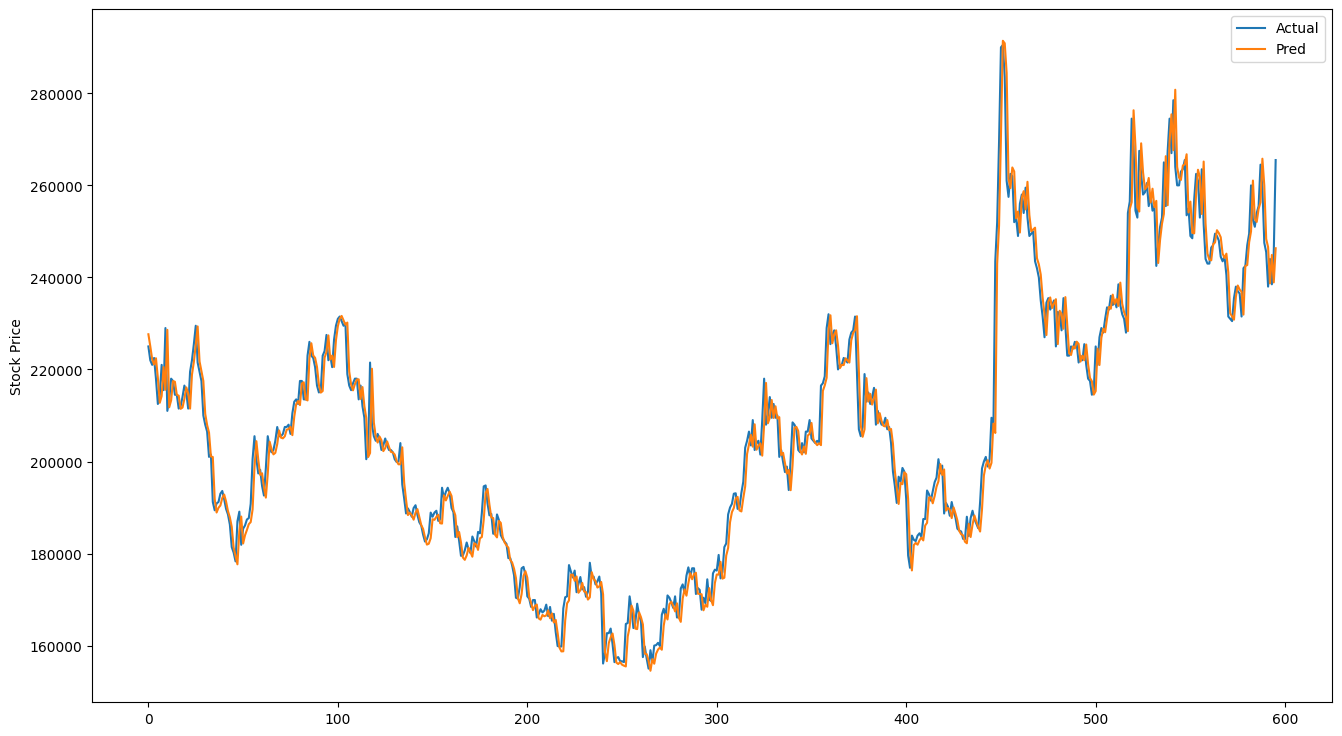

In [41]:
# 실제값 vs 예측값 시계열 비교 그래프
plt.figure(figsize=(16, 9))
plt.plot(y_val_inverse, label='Actual') # 실제 주가(복원값) 시계열
plt.plot(pred_inverse, label='Pred')    # 예측 주가(복원값) 시계열
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [42]:
# 최근 20일 종가로 다음 주가(1-step) 예측 함수
def predict_next_stock_price(data, model, scaler, device):
    data_scaled = scaler.transform(data.reshape(-1, 1))
    data_tensor = torch.tensor(data_scaled, dtype=torch.float).unsqueeze(0)
    data_tensor = data_tensor.to(device)
    print(data_tensor.shape)
    
    model.eval()
    with torch.no_grad():
        output = model(data_tensor)
        pred = output.detach().cpu().numpy()
        
    pred_inverse = scaler.inverse_transform(pred)
    return pred_inverse[-1]

data = naver['Close'].values[-20:]
pred_price = predict_next_stock_price(data, model, scaler, device)
pred_price

torch.Size([1, 20, 1])


array([266729.7], dtype=float32)

In [43]:
data

array([236500, 231500, 242000, 242500, 247000, 249500, 260000, 252500,
       251000, 254000, 255500, 264500, 259500, 247500, 245500, 238000,
       244000, 238500, 245500, 265500])